In [103]:
random.random()

0.011464517935057317

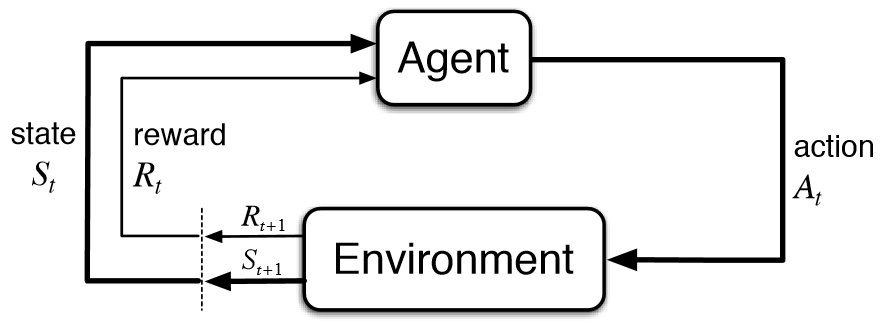



##### S  : Current State of the agent.
##### A  : Current Action Picked according to some policy.
##### S': Next State where the agent ends up.
##### A'  : Next best action to be picked using current Q-value estimation, i.e. pick the action with the maximum Q-value in the next state.
##### R  : Current Reward observed from the environment in Response of current action.
##### $\gamma$  (>0 and <=1) : Discounting Factor for Future Rewards. Future rewards are less valuable than current rewards so they must be discounted. Since Q-value is an estimation of expected rewards from a state, discounting rule applies here as well.
##### $\alpha$  : Step length taken to update the estimation of Q(S, A).

#### _______________________________________________________________________________________________________
##### Choosing the Action to take using :-
##### Greedy policy: $\epsilon$  -greedy policy of is a very simple policy of choosing actions using the current Q-value estimations. (i) With probability ($\epsilon$)  choose any action at random. (ii) With probability (1-$\epsilon$)  choose the action which has the highest Q-value.

### SETTING UP THE ENVIRONMENT
 ##### --- It's a model that is external to the Agent. It provides observation and rewards to agent.
 ##### --- Environement class is capable of handling actions recieved from agent. This is done by action method, which checks the number of steps left and return a reward.
 ##### --- __ init __ constructor is called to set the number of episodes for the event , get_observation() is supposed to return the current environment's observation to the agent.


In [135]:
import random
from typing import List
import numpy as np

states = [0, 1, 2, 3, 4, 5]
rewards = [0, 0, 0, 0, 0, 10]

Q = np.zeros((len(states), len(states)))
alpha = 0.8   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.1 #exploration rate   # we will set the value of epsilon after observing that how much reward its genrating. if it is giving the profit or loss

class SampleEnvironment:
    def __init__(self):
        self.steps_left = 20
        self.threshold = 5
    def get_observation(self):            # information regarding the environment
        if self.steps_left <= self.threshold:
            print("STOCK LIMIT IS ABOUT TO OVER !")
            #raise Exception("STOCK LIMIT IS ABOUT TO OVER !")
        #print("Product Details:")
        #self.steps_left -= 1
        return self.steps_left  # return the current status of product.
    def get_actions(self):                # when agent perform some action they get some rewards
        for episode in range(1000):       # train the Q table
            current_state = 0
            while current_state != 5:

                if random.uniform(0, 1) < epsilon:
                    action = random.choice(states)
                else:
                    action = np.argmax(Q[current_state, :])

                #print(action)
                next_state = action
                reward = rewards[next_state]
                Q[current_state, action] = (1 - alpha) * Q[current_state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))
                current_state = next_state
                #print("Q ---->",Q)
        prices = np.zeros(len(states))
        for i in range(len(states)):
            prices[i] = np.argmax(Q[i, :])
        print("Prices:", prices)
        return [0,1]

        #return Q
        
    def is_done(self):                    # if the set steps are done , now the agent will not perform anything
        return self.steps_left == 0
    def action(self,action : int):
        if self.is_done():
            print("STOCK IS OVER !")
            #raise Exception("STOCK IS OVER !")
        self.steps_left -= 1
        return action


In [136]:
class Agent:
    def __init__(self):
        self.total_reward = 0.0

    def step(self,env : SampleEnvironment):
        current_obs = env.get_observation()   # <---- returns the current steps left. 
        #print("cuurent observation{} ".format(current_obs))
        print("current observation = ",current_obs)
        actions = env.get_actions()   # <---- this will returns the values of Q table which will get stored in 'actions'
        print("actions ----->",random.choice(actions))
        reward = env.action(random.choice(actions))   
        self.total_reward += reward
        print("Reward{}".format(self.total_reward))

#### Main method where agent invokes the the environement

In [137]:
if __name__ == "__main__":

    env = SampleEnvironment()
    agent = Agent()
    #agent.step(env)   

    # print(price)

    while not env.is_done():
        agent.step(env)


print("Total reward got : %.4f" % agent.total_reward)

    # prices = np.zeros(len(states))
    # for i in range(len(states)):
    #     prices[i] = max(Q[i, :])
    # print("_______________________________________")
        

# NOW we may change the price based on the rewards generated or can take any decision.

current observation =  20
Prices: [5. 0. 0. 0. 0. 0.]
actions -----> 0
Reward1.0
current observation =  19
Prices: [5. 5. 0. 0. 0. 0.]
actions -----> 1
Reward1.0
current observation =  18
Prices: [5. 5. 0. 5. 0. 0.]
actions -----> 0
Reward1.0
current observation =  17
Prices: [5. 5. 0. 5. 0. 0.]
actions -----> 0
Reward2.0
current observation =  16
Prices: [5. 5. 0. 5. 0. 0.]
actions -----> 1
Reward2.0
current observation =  15
Prices: [5. 5. 0. 5. 0. 0.]
actions -----> 0
Reward2.0
current observation =  14
Prices: [5. 5. 0. 5. 0. 0.]
actions -----> 0
Reward3.0
current observation =  13
Prices: [5. 5. 0. 5. 0. 0.]
actions -----> 0
Reward4.0
current observation =  12
Prices: [5. 5. 5. 5. 0. 0.]
actions -----> 1
Reward4.0
current observation =  11
Prices: [5. 5. 5. 5. 0. 0.]
actions -----> 1
Reward4.0
current observation =  10
Prices: [5. 5. 5. 5. 0. 0.]
actions -----> 0
Reward5.0
current observation =  9
Prices: [5. 5. 5. 5. 0. 0.]
actions -----> 0
Reward6.0
current observation =  8
Pric